<a href="https://colab.research.google.com/github/kotharisanjana/Blue-sky-challenge-BinaryBrains/blob/master/Assignment2/Pycaret_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [ ]:
!pip install pycaret --user
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 10.4 MB 32.3 MB/s 
     |████████████████████████████████| 1.7 MB 14.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 67.4 MB/s 
     |████████████████████████████████| 88 kB 6.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 636 kB 70.8 MB/s 
     |████████████████████████████████| 3.3 MB 37.0 MB/s 
     |████████████████████████████████| 1.3 MB 39.4 MB/s 
     |████████████████████████████████| 2.0 MB 40.5 MB/s 
     |████████████████████████████████| 17.0 MB 38.7 MB/s 
     |████████████████████████████████| 268 kB 70.8 MB/s 
     |███████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Kaggle API credentials

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 80.5kB/s]


## Imports

In [ ]:
import opendatasets as od
import pandas as pd
from pycaret.clustering import *
import pandas_profiling as pp 
from datetime import datetime, timedelta

pd.set_option('display.max_columns', None)

## Download dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset')

100%|██████████| 21.8M/21.8M [00:00<00:00, 112MB/s] 


In [ ]:
df = pd.read_excel('/content/customer-segmentation-dataset/Online Retail.xlsx')

## EDA

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data manipulation

In [ ]:
df["InvoiceDate"] = df["InvoiceDate"].dt.date
df["TotalSum"] = df["Quantity"] * df["UnitPrice"]
snapshot_date = max(df.InvoiceDate) + timedelta(days = 1)
customers = df.groupby(['CustomerID', 'Country']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'}).reset_index()
customers.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'PurchasePrice'}, inplace = True)
customers.drop(['CustomerID'], axis = 1, inplace = True)

In [ ]:
customers = customers[customers.PurchasePrice > 0]

In [ ]:
customers.head()

Country  Recency  Frequency  PurchasePrice
1  Iceland        3        182        4310.00
2  Finland       76         31        1797.24
3    Italy       19         73        1757.55
4   Norway      311         17         334.40
5   Norway       37         95        1545.41

In [ ]:
customers.shape

(4330, 4)

In [ ]:
pp.ProfileReport(customers)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
clustering = setup(customers, \
                   session_id = 1, \
                   normalize = True, \
                   categorical_features = ['Country'], \
                   transformation = True, \
                    )

Description                 Value
0                               session_id                     1
1                            Original Data             (4330, 4)
2                           Missing Values                 False
3                         Numeric Features                     3
4                     Categorical Features                     1
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (4330, 40)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  6f55
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                  True
24                   Transformation Method           yeo-johnson
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Country'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numer...
                                                  target='UNSUPERVISED_DUMMY_TARGET')),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough

In [ ]:
prep_pipe = get_config('prep_pipe') 
df0 = prep_pipe.transform(customers) 

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=prep_pipe)
INFO:logs:Global variable: prep_pipe returned as Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Country'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numer...
                                                  target='UNSUPERVISED_DUMMY_TARGET')),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all',

In [ ]:
df0.head()

Recency  Frequency  PurchasePrice  Country_Australia  Country_Austria  \
1 -1.286732   1.413548       1.783839                0.0              0.0   
2  0.286158  -0.489288       0.870242                0.0              0.0   
3 -0.853658   0.403460       0.841911                0.0              0.0   
4  1.657423  -0.886289      -0.778641                0.0              0.0   
5 -0.427416   0.723740       0.677922                0.0              0.0   

   Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  \
1              0.0              0.0             0.0             0.0   
2              0.0              0.0             0.0             0.0   
3              0.0              0.0             0.0             0.0   
4              0.0              0.0             0.0             0.0   
5              0.0              0.0             0.0             0.0   

   Country_Channel Islands  ...  Country_RSA  Country_Saudi Arabia  \
1                      0.0  ...          0.0                   0.0   
2                      0.0  ...          0.0                   0.0   
3                      0.0  ...          0.0                   0.0   
4                      0.0  ...          0.0                   0.0   
5                      0.0  ...          0.0                   0.0   

   Country_Singapore  Country_Spain  Country_Sweden  Country_Switzerland  \
1                0.0            0.0             0.0                  0.0   
2                0.0            0.0             0.0                  0.0   
3                0.0            0.0             0.0                  0.0   
4                0.0            0.0             0.0                  0.0   
5                0.0            0.0             0.0                  0.0   

   Country_USA  Country_United Arab Emirates  Country_United Kingdom  \
1          0.0                           0.0                     0.0   
2          0.0                           0.0                     0.0   
3          0.0                           0.0                     0.0   
4          0.0                           0.0                     0.0   
5          0.0                           0.0                     0.0   

   Country_Unspecified  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
5                  0.0  

[5 rows x 40 columns]

## Create model 


In [ ]:
models()

INFO:logs:gpu_param set to False


Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.3379          3520.6825            1.11            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluate_model(kmeans)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

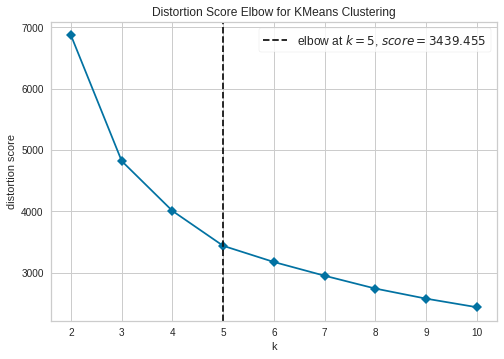

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
meanshift = create_model('meanshift')

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0           0                  0               0            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=-1, seeds=None)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluate_model(meanshift)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=-1, seeds=None), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

## Assign model

In [ ]:
result = assign_model(kmeans)
result.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=1, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(4330, 5)
INFO:logs:assign_model() succesfully completed......................................


Country  Recency  Frequency  PurchasePrice    Cluster
1  Iceland        3        182        4310.00  Cluster 2
2  Finland       76         31        1797.24  Cluster 3
3    Italy       19         73        1757.55  Cluster 3
4   Norway      311         17         334.40  Cluster 1
5   Norway       37         95        1545.41  Cluster 3